In [1]:
import os
from config import DATA_DOWNLOAD_URL
from parser import parser
import numpy as np
import geopandas
import json
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
lons = []
lats = []
datas = []
#make the points list for the 3 dataset 
for file in os.listdir(f"{DATA_DOWNLOAD_URL}/2025-01-16/"):
    hdfData = parser(f"{DATA_DOWNLOAD_URL}/2025-01-16/{file}")
    lons.append(hdfData["lons"])
    lats.append(hdfData["lats"])
    datas.append(hdfData["datas"])
flattened_lons = np.stack(lons).flatten()
flattened_lats = np.stack(lats).flatten()
flattened_datas = np.stack(datas).flatten()

In [ ]:
points = geopandas.points_from_xy(x=flattened_lons, y=flattened_lats) #list of points from flattened lat and lon
point_index_map = {point: idx for idx, point in enumerate(points)} #make a dict with points and indices to retreive valid data (dict search quicker than for loops)

In [ ]:
res = []
for dep in os.listdir("data/coords/"):
    with open(f'data/coords/{dep}') as json_file:
        valid_point_file = json.load(json_file)
    valid_points = geopandas.points_from_xy(x=valid_point_file["valid_lon"], y=valid_point_file["valid_lat"])
    valid_lon = [point.x for point in valid_points] #lon and lat from indices #one time per dep
    valid_lat = [point.y for point in valid_points]
    valid_indices = [point_index_map[point] for point in valid_points]
    for dir in os.listdir(f"{DATA_DOWNLOAD_URL}/"):
        data_list = []
        for file in os.listdir(f"{DATA_DOWNLOAD_URL}/{dir}/"):
            hdfData = parser(f"{DATA_DOWNLOAD_URL}/{dir}/{file}")
            data_list.append(hdfData["datas"])
        flattened_datas = np.stack(datas).flatten()
        valid_data = [flattened_datas[i] for i in valid_indices]
        res.append({"departement": valid_point_file["name"], "code": valid_point_file["code"], "date": dir, "data": {"lon": valid_lon, "lat": valid_lat, "evi": valid_data}})

1-Ain.json
2025-01-16
MOD13Q1.A2025001.h17v04.061.2025022084544.hdf
MOD13Q1.A2025001.h18v03.061.2025022080925.hdf
MOD13Q1.A2025001.h18v04.061.2025022083416.hdf


In [8]:
# Opening JSON file
with open('data/coords/1-Ain.json') as json_file:
    valid_point_file = json.load(json_file)
valid_points = geopandas.points_from_xy(x=valid_point_file["valid_lon"], y=valid_point_file["valid_lat"])
valid_points

<GeometryArray>
[<POINT (4.938 46.515)>, <POINT (4.941 46.515)>, <POINT (4.977 46.515)>,
  <POINT (4.98 46.515)>, <POINT (4.983 46.515)>, <POINT (4.986 46.515)>,
 <POINT (4.937 46.512)>,  <POINT (4.94 46.512)>, <POINT (4.965 46.512)>,
 <POINT (4.968 46.512)>,
 ...
 <POINT (5.623 45.617)>, <POINT (5.626 45.617)>, <POINT (5.629 45.617)>,
 <POINT (5.632 45.617)>, <POINT (5.623 45.615)>, <POINT (5.626 45.615)>,
 <POINT (5.629 45.615)>, <POINT (5.632 45.615)>, <POINT (5.629 45.612)>,
 <POINT (5.632 45.612)>]
Length: 107500, dtype: geometry

In [ ]:
valid_indices = [point_index_map[point] for point in valid_points] #get indexes for valid_point found #to do one time per dep

In [ ]:
valid_lon = [point.x for point in valid_points] #lon and lat from indices #one time per dep
valid_lat = [point.y for point in valid_points]

In [ ]:
valid_data = [flattened_datas[i] for i in valid_indices] #get data from indices list #to refresh for every date

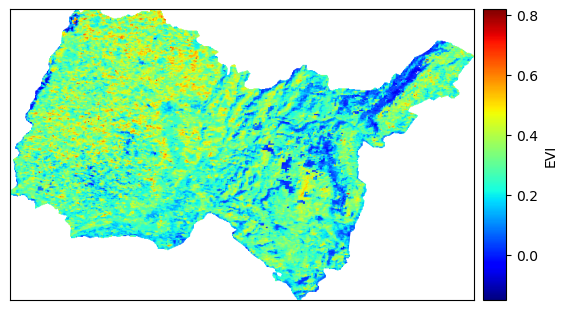

In [14]:
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=np.min(valid_lat),  urcrnrlat=np.max(valid_lat),
            llcrnrlon=np.min(valid_lon), urcrnrlon=np.max(valid_lon))
m.drawcoastlines(linewidth=0.5)
m.scatter(valid_lon, valid_lat, c=valid_data, s=1, cmap=plt.cm.jet,
          edgecolors=None, linewidth=0)
cb = m.colorbar()
cb.set_label("EVI")
plt.show()

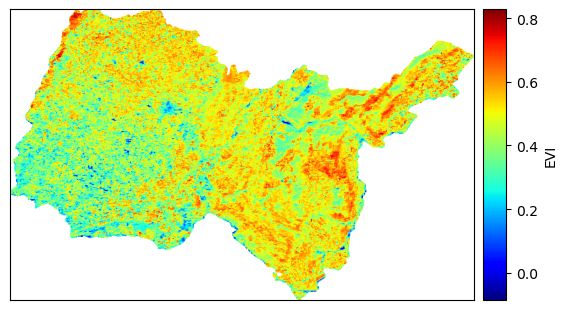

In [18]:
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=np.min(valid_lat),  urcrnrlat=np.max(valid_lat),
            llcrnrlon=np.min(valid_lon), urcrnrlon=np.max(valid_lon))
m.drawcoastlines(linewidth=0.5)
m.scatter(valid_lon, valid_lat, c=valid_data, s=1, cmap=plt.cm.jet,
          edgecolors=None, linewidth=0)
cb = m.colorbar()
cb.set_label("EVI")
plt.show()

In [ ]:
files = []
for directory in os.listdir(f"{DATA_DOWNLOAD_URL}/"):
    for file in os.listdir(f"{DATA_DOWNLOAD_URL}/{directory}/"):
        hdfData = parser(f"{DATA_DOWNLOAD_URL}/{directory}/{file}")




1731